![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE


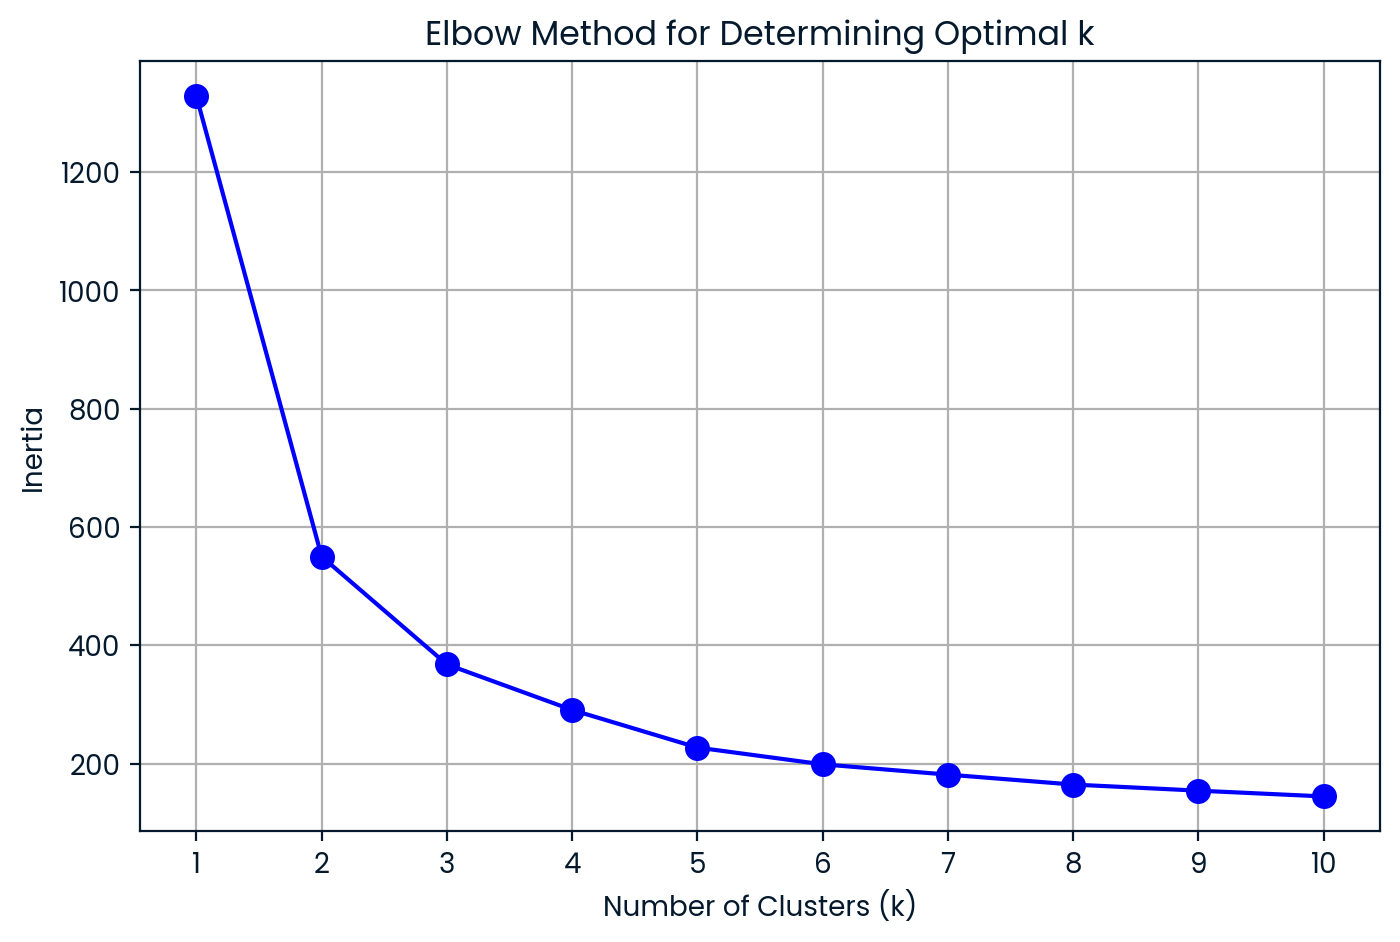

,cluster,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,38.305469,18.098437,188.554688,3587.500000
1,1,49.792982,15.738596,221.912281,5519.736842
2,2,47.662353,18.748235,196.917647,3898.235294
3,3,45.522581,14.314516,212.935484,4699.596774


In [7]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
print(penguins_df.head())

# For numeric columns, fill with the mean
numeric_cols = penguins_df.select_dtypes(include=['float64', 'int64']).columns
penguins_df[numeric_cols] = penguins_df[numeric_cols].fillna(penguins_df[numeric_cols].mean())

# For the 'sex' column, fill with the most common value (mode)
penguins_df['sex'] = penguins_df['sex'].fillna(penguins_df['sex'].mode()[0])
penguins_numeric = penguins_df[numeric_cols]

# Scale the data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_numeric)
inertias = []
k_values = range(1, 11)  # Testing cluster counts from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_scaled)
    inertias.append(kmeans.inertia_)

# Plot the inertias to visualize the elbow point
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# Perform KMeans clustering, will use 4 s shown in the ebow pot
kmeans = KMeans(n_clusters=4, random_state=42)
penguins_df['cluster'] = kmeans.fit_predict(penguins_scaled)

# Collect the average values for the clusters
stat_penguins = penguins_df.groupby('cluster').mean().reset_index()

# Display the resulting DataFrame
stat_penguins